In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
torch.cuda.is_available()

True

In [4]:
tfms = get_transforms(do_flip=True,flip_vert=False,max_rotate=10.0,max_zoom=1.1,max_lighting=0.2,max_warp=0.2,p_affine=0.75,p_lighting=0.75)


In [5]:
np.random.seed(42)


In [6]:
src = (ImageList.from_folder(path='data').split_by_rand_pct(0.2).label_from_folder())

In [7]:
src

LabelLists;

Train: LabelList (120 items)
x: ImageList
Image (3, 575, 750),Image (3, 593, 1013),Image (3, 583, 1200),Image (3, 435, 950),Image (3, 539, 718)
y: CategoryList
twitter,twitter,twitter,twitter,twitter
Path: data;

Valid: LabelList (29 items)
x: ImageList
Image (3, 1440, 972),Image (3, 1800, 2747),Image (3, 810, 540),Image (3, 1920, 1080),Image (3, 1200, 726)
y: CategoryList
other,twitter,other,other,other
Path: data;

Test: None

In [8]:
data = src.transform(size=512).databunch(bs=4).normalize(imagenet_stats)

In [9]:
data.c

2

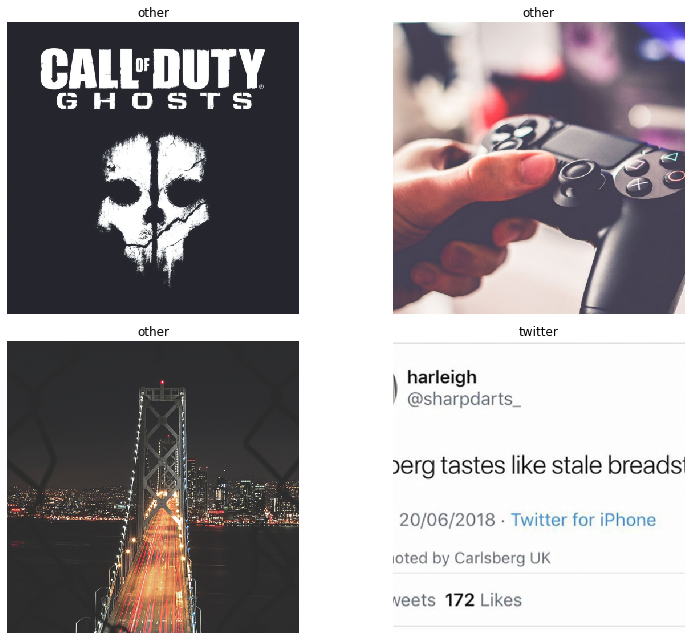

In [10]:
data.show_batch(rows=3, figsize=(12,9))

In [11]:
learn = cnn_learner(data, models.densenet161, metrics=[error_rate, accuracy, FBeta(beta=1)])


Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /home/ubuntu/.cache/torch/checkpoints/densenet161-8d451a50.pth
100%|██████████| 110M/110M [00:01<00:00, 94.1MB/s] 


In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


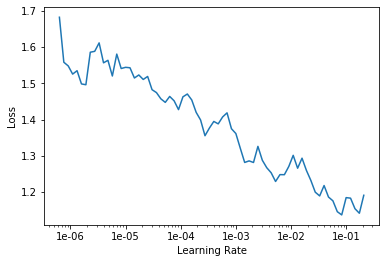

In [13]:
learn.recorder.plot()

In [14]:
lr=1e-3

In [15]:
learn.fit_one_cycle(10,1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.225927,0.266247,0.172414,0.827586,0.666667,00:15
1,0.877736,0.183560,0.068966,0.931035,0.833333,00:09
2,0.660066,0.163498,0.068966,0.931035,0.833333,00:09
3,0.607247,0.525989,0.172414,0.827586,0.666667,00:10
4,0.556153,0.154326,0.034483,0.965517,0.909091,00:09
5,0.439098,0.114814,0.034483,0.965517,0.909091,00:10
6,0.388325,0.123934,0.034483,0.965517,0.909091,00:09
7,0.318896,0.047827,0.000000,1.000000,1.000000,00:09
8,0.272593,0.047271,0.000000,1.000000,1.000000,00:09
9,0.228055,0.024733,0.000000,1.000000,1.000000,00:09
